<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

Эту метрику используют для бинарной классификации. Она хорошо подходит для задач, когда классы не сбалансированы. По факту эта метрика говорит нам, какое в среднем качество нашего классификатора, где "в среднем" берется по всем возможным вероятностным порогам разделения выборки.

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

Например тогда, когда у нас неравноценные пенальти за мисклассификацию. Т.е. штрафы за то, что мы назвали 1 нулем, не равен штрафу за то, что мы назвали 0 единицей. Также, тогда, когда доля одного из классов очень мала и мы хотим его искать (т.е. нам важно очень хорошо угадывать этот класс). Суть в том, что AUC-ROC не зависит от $P(Y = 1)$ и является, как уже выше было замечено, некой агрегацией/усреднением по различным $P(Y = 1)$.  Таким образом данная метрика не учитывает соотношение классов, что может быть важно в некоторых задачах.

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

Внутренние - для оценки эмперического риска модели. Внешние - для обобщенного риска модели. Т.е. внутренние дают нам понять, насколько хорошо мы обучились, а внешние - насколько хорошо наша модель будет работать на новых данных

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

Эмпирические критерии выдают нам оценки качества на тех данных, которые мы имеем. Мы пытаемся оценить обобщающую способность алгоритма, используя отложенную часть начальных данных. Например CV

В аналитических критериях же все не совсем так. Мы пытаемся оценить вероятность ошибки нашей модели на произвольной выборке и стремимся минимизировать верхнюю оценку для этой вероятности.

**Вопрос 5**: Что такое критерий регуляризации?

Критерий учитывает в себе следующие вещи: функция штрафа за сложность модели и ошибка на тренировочной выборке. Суть в том, что мы начинаем начислять модели какое-то пенальти (помимо ошибки на обучении) за то, что она настраивает больше параметров, и стараемся минимизировать новую функцию

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка датасета Spambase

In [2]:
import pandas
import urllib.request as urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    str(line.strip()).split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,b'word_freq_make,b'word_freq_address,b'word_freq_all,b'word_freq_3d,b'word_freq_our,b'word_freq_over,b'word_freq_remove,b'word_freq_internet,b'word_freq_order,b'word_freq_mail,...,b'char_freq_;,b'char_freq_(,b'char_freq_[,b'char_freq_!,b'char_freq_$,b'char_freq_#,b'capital_run_length_average,b'capital_run_length_longest,b'capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Задание**
- Сколько примеров писем в датасете?
- Какова доля плохих писем?
- Какие характерные группы признаков представлены в наборе?

In [3]:
spam_data.describe()

,b'word_freq_make,b'word_freq_address,b'word_freq_all,b'word_freq_3d,b'word_freq_our,b'word_freq_over,b'word_freq_remove,b'word_freq_internet,b'word_freq_order,b'word_freq_mail,...,b'char_freq_;,b'char_freq_(,b'char_freq_[,b'char_freq_!,b'char_freq_$,b'char_freq_#,b'capital_run_length_average,b'capital_run_length_longest,b'capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


4601 письмо, ~40% спама

In [4]:
page = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION')
for line in page.readlines():
    if line != b'\r\n':
        print (line.strip())

b'1. Title:  SPAM E-mail Database'
b'2. Sources:'
b'(a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt'
b'Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304'
b'(b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835'
b'(c) Generated: June-July 1999'
b'3. Past Usage:'
b'(a) Hewlett-Packard Internal-only Technical Report. External forthcoming.'
b'(b) Determine whether a given email is spam or not.'
b'(c) ~7% misclassification error.'
b'False positives (marking good mail as spam) are very undesirable.'
b'If we insist on zero false positives in the training/testing set,'
b'20-25% of the spam passed through the filter.'
b'4. Relevant Information:'
b'The "spam" concept is diverse: advertisements for products/web'
b'sites, make money fast schemes, chain letters, pornography...'
b'Our collection of spam e-mails came from our postmaster and'
b'individuals who had filed spam.  Our collection of non-spam'
b'e-mails came from filed work and personal e-m

Большая часть признаков частоты различных слов. Есть также другие несколько признаков - например средняя длина подряд идущих последовательностей из больших букв

### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель
2) Решающее дерево
3) KNN
4) KNN с масштабированием признаков

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import warnings

warnings.simplefilter('ignore')

In [6]:
X_train, y_train = spam_data[:3000].drop('spam', axis=1), spam_data[:3000].spam
X_test, y_test = spam_data[3000:].drop('spam', axis=1), spam_data[3000:].spam

In [7]:
clf = DecisionTreeClassifier(max_depth=7, criterion='gini', random_state=727)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [8]:
def print_score(y_pred, y_test):
    print ('accuracy: {:.5f} \nprecision: {:.5f} \
           \nrecall: {:.5f} \nf1: {:.5f}'.format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
                                                 recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

In [9]:
print_score(y_pred, y_test)

accuracy: 0.77139 
precision: 0.00000            
recall: 0.00000 
f1: 0.00000


In [10]:
np.mean(y_test), np.mean(y_train)

(0.0, 0.60433333333333328)

Сразу становится понятно, почему скор классификатора смысла не имеет. В тестовой выборке просто напросто нет писем со спамом. Результат можно улучшить сделав рандомное разделение на тестовую и тренировочную выборки - что собственно и реализовано далее

In [11]:
dtrain, dtest = train_test_split(spam_data, train_size=3000, random_state=443)
X_train, y_train = dtrain.drop('spam', axis = 1), dtrain.spam
X_test, y_test = dtest.drop('spam', axis=1), dtest.spam

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
print_score(y_pred, y_test)

accuracy: 0.91380 
precision: 0.90984            
recall: 0.86991 
f1: 0.88942


In [14]:
importances = sorted(zip(clf.feature_importances_, X_train.columns), reverse=True)
for x,y in importances:
    if x > 0:
        print (x,y)

0.434213532984 b'char_freq_!
0.121538070237 b'capital_run_length_longest
0.1047254396 b'char_freq_$
0.0698921714381 b'word_freq_hp
0.0577686289588 b'word_freq_free
0.0573148876252 b'word_freq_remove
0.0224515580439 b'capital_run_length_average
0.0188836871155 b'word_freq_edu
0.0174867287717 b'word_freq_george
0.0142177327073 b'word_freq_business
0.0104854080665 b'word_freq_internet
0.00854433216806 b'word_freq_our
0.00851693842572 b'word_freq_email
0.00817070542278 b'capital_run_length_total
0.00811455859463 b'word_freq_your
0.00486963627573 b'word_freq_meeting
0.00477736244329 b'word_freq_cs
0.0042233938022 b'word_freq_people
0.00403119180768 b'word_freq_money
0.00335882121024 b'word_freq_receive
0.00330948756804 b'word_freq_hpl
0.00284570919293 b'word_freq_all
0.00262409394328 b'word_freq_re
0.00161867874635 b'word_freq_mail
0.00157073858973 b'word_freq_table
0.0015281636945 b'word_freq_data
0.00152710696224 b'word_freq_make
0.00139123560543 b'char_freq_;


Теперь по поводу константных моделей.

In [15]:
for k in [0,1]:
    dummy_clf = DummyClassifier(strategy='constant', constant=k)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    print ('c: %d' % k)
    print_score(y_pred, y_test)

c: 0
accuracy: 0.60150 
precision: 0.00000            
recall: 0.00000 
f1: 0.00000
c: 1
accuracy: 0.39850 
precision: 0.39850            
recall: 1.00000 
f1: 0.56990


In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print_score(y_pred, y_test)

accuracy: 0.76765 
precision: 0.73665            
recall: 0.64890 
f1: 0.69000


In [17]:
normalized_data = (spam_data - spam_data.mean()) / (spam_data.max() - spam_data.min())
normalized_data.spam = normalized_data.spam.apply(lambda x: 1 if x > 0 else 0)
dtrain, dtest = train_test_split(normalized_data, train_size=3000, random_state=443)
X_train_normalized, y_train = dtrain.drop('spam', axis = 1), dtrain.spam
X_test_normalized, y_test = dtest.drop('spam', axis=1), dtest.spam

In [18]:
knn_clf_normalized = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn_clf_normalized.fit(X_train_normalized, y_train)
y_pred = knn_clf_normalized.predict(X_test_normalized)
print_score(y_pred, y_test)

accuracy: 0.88320 
precision: 0.90340            
recall: 0.79154 
f1: 0.84378


Как видим это дало улучшение скора для KNN, причем значительное. Связно это с тем, что теперь вклад каждого признака в итоговую классификацию стал равноценным. Т.е. не бывает такого, что один признак, который принимает очень большие значения, определяет по факту чему равно расстояние между объектами и очень сильно влияет на классификацию

In [19]:
clf.fit(X_train_normalized, y_train)
y_pred = clf.predict(X_test_normalized)
print_score(y_pred, y_test)

accuracy: 0.91380 
precision: 0.90984            
recall: 0.86991 
f1: 0.88942


Качество дерева не изменилось потому, что относительное положение фичей объектов в выборке между собой не поменялось. Т.к. дерево по факту все, что делает - это ставит разбиения выборки по какому-то порогу по какой-то фиче в каждой из вершин -, при масштабировании фичей лишь меняются эти пороги. На разделение выборки на части это никак не влияет

Итак, как было выявлено, лучше всего для решения данной задачи предположительно подходят решающие деревья. Использовать константый классификатор конечно же не стоит

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

 Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

http://www.machinelearning.ru/wiki/images/8/89/Voron-ML-Ranking-slides.pdf

Изначально рассматривается задача ранжирования документов. Доля дефектных пар - это относительное количество инверсий документов в векторе ответов нашего алгоритма.

Теперь объясним этот термин для задач бинарной классификации. Пусть вероятности принадлежности классу 1, выданные алгоритмом на выборке X: $p_1,...,p_n$, а реальные метки классов: $y_1,...,y_n$. БОО можно считать, что индексы объектов идут по возрастанию p. Тогда $DP = \frac{1}{C_n^2}\sum\limits_{i < j} 1_{y_i > y_j}$

Теперь найдем связь между DP и ROC-AUC. 
Пусть $N_+ = \left|\{y_i | y_i = 1\}\right|, N_- = \left|\{y_i | y_i = -1\}\right|$. Рассмотрим, как изменятся TPR и FPR при сдвиге вероятностного порога на один объект вниз. Т.е. пусть мы подвинули порог так, что поменялась метка класса для объекта $y_j$.

$TPR_{new} = \begin{cases} TPR_{old} + \frac{1}{N_+} & y_j = 1 \\ TPR_{old} & y_j = -1 \end{cases} ~~~
FPR_{new} = \begin{cases} FPR_{old} & y_j = 1 \\ FPR_{old} + \frac{1}{N_-} & y_j = -1 \end{cases}$

Тогда, если $y_j = -1$, при прохождении этой точки AUC-ROC увеличится на $\frac{TPR_{cur}}{N_-} = 
\sum\limits_{i = j + 1}^{n} \frac{1_{y_i = 1}}{N_+ N_-}$. 
Таким образом $AUC = \sum\limits_{j = 1}^{n} \sum\limits_{i = j + 1}^{n} \frac{1_{y_i = 1}1_{y_j = -1}}{N_+ N_-} = \sum\limits_{j < i} \frac{1_{y_i > y_j}}{N_+ N_-} = 
\sum\limits_{j < i} \frac{1 - 1_{y_i < y_j} - 1_{y_i = y_j}}{N_+ N_-} =
\frac{C_n^2}{N_+N_-} - \frac{C_{N_+}^2}{N_+N_-} - \frac{C_{N_-}^2}{N_+N_-} - 
\sum\limits_{j < i} \frac{1_{y_i < y_j}}{N_+ N_-} = \left[n = N_+ + N_-\right] = 1 - DP\frac{C_n^2}{N_+N_-}$

**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.


Пусть метки классов $Y \in \{-1, +1\}$

$b(x_i) = 1, y_i = (-1) ^ i$

**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?



** Ответ: **
Да верно. В KNN оценкой принадлежности является $\frac{\text{количество соседей с классом 1}}{k}$, а сравнение проводится с порогом $\frac{1}{2}$. Т.е., если больше половины соседей имеют класс 1, присваиваем данному объекту тоже класс 1.

В классификаторе, который выдает константу, сравнение вероятности принадлежности классу происходит с произвольным числом, больше 1 (или меньше -1 - в зависимости от того, какой из классов предсказывает константа). Таким образом у нас всегда вероятность всегда меньше (больше) пороговой и классификатор выдает только один класс.

В дереве в каждой вершине выбирается какой-то признак и подбирается порог. После этого происходит сравнение значения данного признака с порогом. Пусть после таких сравнений наш элемент попал в лист l. Тогда вероятность элемента принадлежности классу 1 - это доля объектов тренировочной выборки с классом 1 в этом листе. Далее просто происходит сравнение данной вероятности с $\frac{1}{2}$

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns

In [21]:
fpr = []
tpr = []
labels = ['tree', 'knn', 'knn_normalized', 'const']
auc_score = []
classifiers = [(clf, X_test_normalized), (knn_clf, X_test), (knn_clf_normalized, X_test_normalized), (dummy_clf, X_test)]
for i in range(4) :
    c, X = classifiers[i]
    y_pred = c.predict_proba(X)[:,1]
    auc_score.append(roc_auc_score(y_test, y_pred))
    fp, tp, _ = roc_curve(y_test, y_pred)
    fpr.append(fp)
    tpr.append(tp)

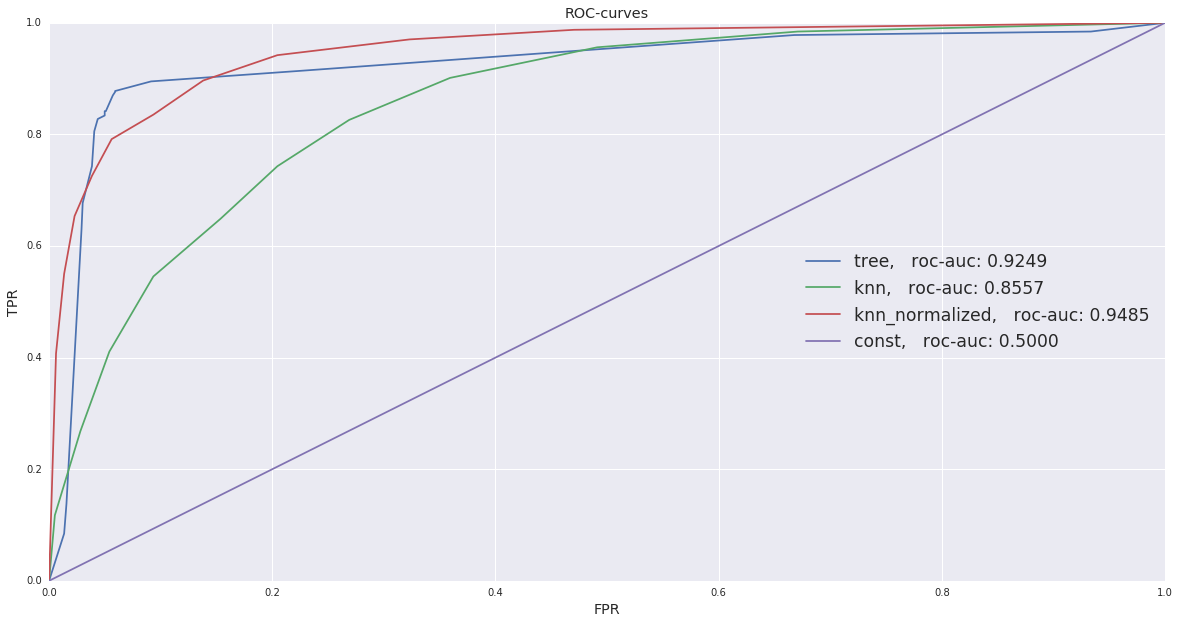

In [22]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=labels[i] + ',   roc-auc: {:.4f}'.format(auc_score[i]))
plt.legend(loc='center right', fontsize='x-large')
plt.xlabel('FPR', fontsize='large')
plt.ylabel('TPR', fontsize='large')
plt.title('ROC-curves', fontsize='large')

In [23]:
pr = []
rec = []
for i in range(4):
    c, X = classifiers[i]
    y_pred = c.predict_proba(X)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr.append(precision)
    rec.append(recall)

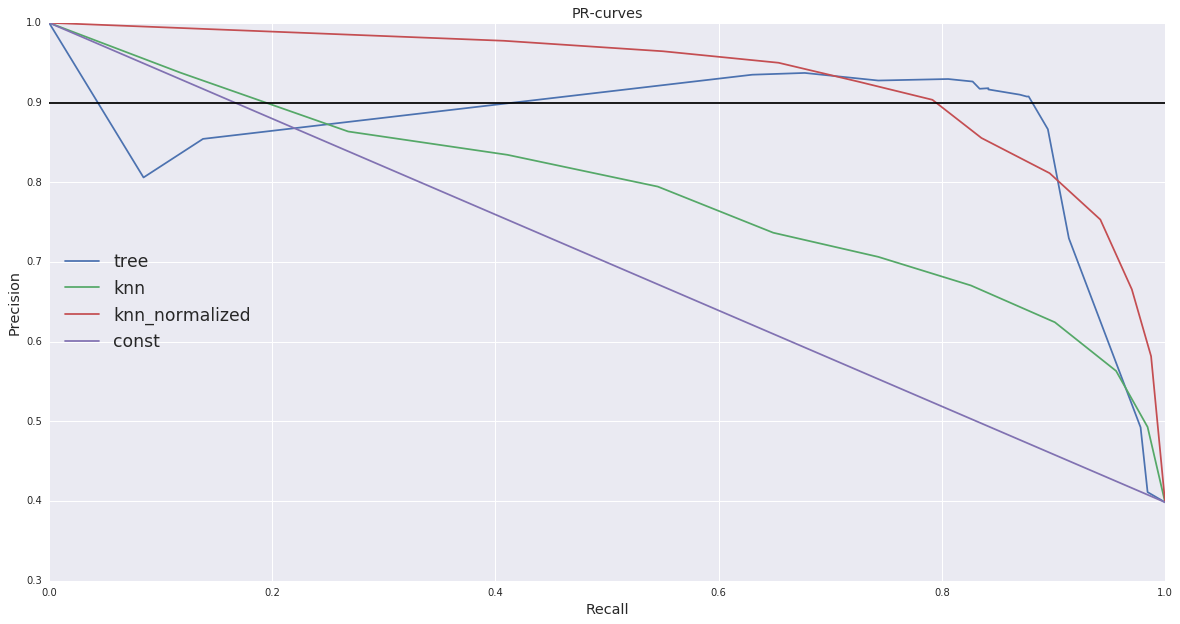

In [24]:
plt.figure(figsize=(20,10))
labels = ['tree', 'knn', 'knn_normalized', 'const']
for i in range(4):
    plt.plot(rec[i], pr[i], label=labels[i])
plt.legend(loc='center left', fontsize='x-large')
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large')
plt.axhline(y=0.9, xmin=0, xmax=1, hold=None, color='black')
plt.title('PR-curves', fontsize='large')

Черная линия соответствует уровню точности 0.9. Пересечения ее с различными PR-кривыми дают ответ на вопрос о максимальной полноте при заданном минимальном уровне точности.

### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидаци, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

<h1 align="center">Примеры</h1> 

In [25]:
from sklearn.grid_search import GridSearchCV

### Tree

In [35]:
params = {
    'max_depth' : list(range(3,10)),
    'criterion' : ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': list(range(1,12,2))
}
gs = GridSearchCV(clf, params, scoring='roc_auc', n_jobs=4, cv=4, verbose=True)
gs.fit(X_train, y_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits


[Parallel(n_jobs=4)]: Done 420 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 1008 out of 1008 | elapsed:    8.6s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=727, splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3, 5, 7, 9, 11], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc',
       verbose=True)

In [36]:
gs.best_score_, gs.best_params_

(0.95137929972070245,
 {'criterion': 'entropy',
  'max_depth': 8,
  'max_features': None,
  'min_samples_leaf': 9})

In [39]:
y_pred = gs.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.96097292616789876

### KNN

In [42]:
params = {
    'n_neighbors' : list(range(3,20,2)),
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev', 'manhattan']
}
gs = GridSearchCV(knn_clf, params, scoring='roc_auc', n_jobs=4, cv=4, verbose=True)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:    4.3s finished


(0.91553817286063588,
 {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'})

In [43]:
y_pred = gs.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.91911053818884936

### KNN normalized

In [44]:
params = {
    'n_neighbors' : list(range(3,20,2)),
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev', 'manhattan']
}
gs = GridSearchCV(knn_clf, params, scoring='roc_auc', n_jobs=4, cv=4, verbose=True)
gs.fit(X_train_normalized, y_train)
gs.best_score_, gs.best_params_

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.9s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:   24.8s finished


(0.96286009379307447,
 {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'})

In [45]:
y_pred = gs.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.89869936880894019

## Обучение решающего дерева

In [46]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

#### Важность признаков

Важность признаков вычисляется на основании частоты разбиения по признаку и глубины узлов дерева в которых происходило разбиение по признаку.

In [49]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print ('%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx]))

2 petal length (cm), importance = 0.59
3 petal width (cm), importance = 0.41
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


#### Ошибочно классифицированные объекты обучающей выборки

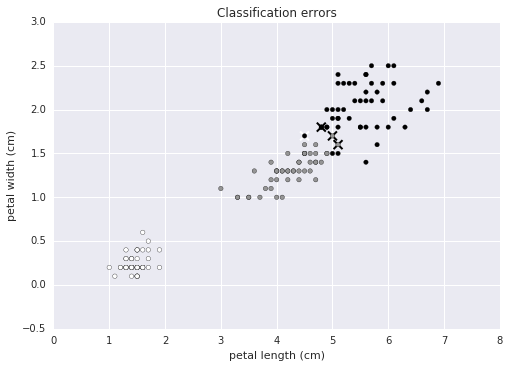

In [50]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

#### Визуализация дерева

In [51]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

In [52]:
!dot -Tpng tree.dot -o tree.png

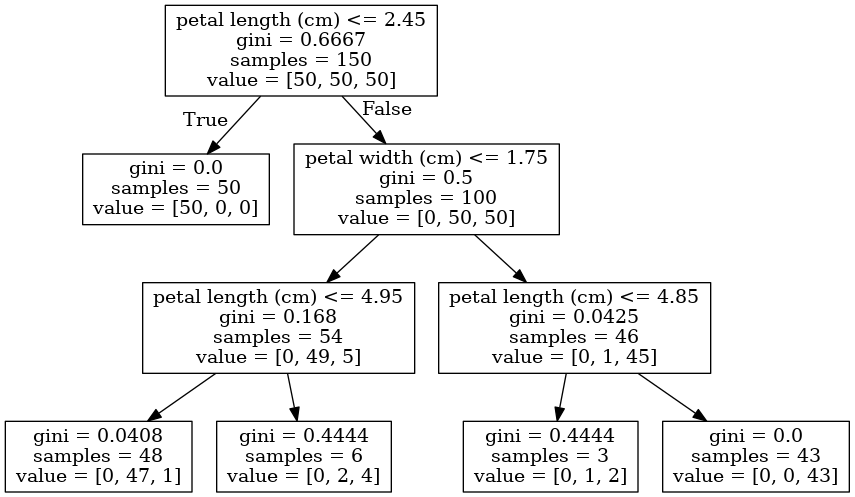

In [53]:
from IPython.display import Image
Image('tree.png')

## Кросс-валидация

In [54]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Зафиксируем разбиение для 5-fold кросс-валидации.

In [55]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Обратите внимание на аргументы:
 

- shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
- random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.


Оценим качество регрессии KNN на наборе Boston Housing для различных значений K (число соседей). В качестве метрики качества возьмем модуль отклонения:

 $MAE=\sum_i|y_{pred,i}-y_i|$


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Переберем ряд значений n_neigbors, для каждого оценим среднее и стандартное отклонение MAE по кросс-валидации. Магия %%time позволяет измерить время работы ячейки с кодом.

In [58]:
%%time 

k_values = list(range(1, 10)) + list(range(10, 50, 5))
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 277 ms, sys: 0 ns, total: 277 ms
Wall time: 274 ms


#### График, демонстрирующий оптимальность выбора числа соседей

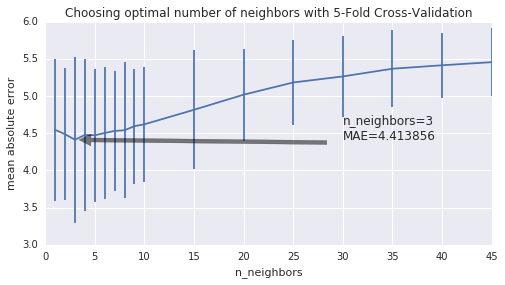

In [59]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))